In [17]:
import pandas as pd

file_path = "C:/Users/comp/Downloads/eeg_oddball_500p.csv"  
df = pd.read_csv(file_path)
df.head()

,participant_id,group,trial,channel,target,t0ms,t4ms,t8ms,t12ms,t16ms,...,t963ms,t967ms,t971ms,t975ms,t979ms,t983ms,t987ms,t991ms,t995ms,t1000ms
0,0,control,0,Cz,0,0.625084,-0.866273,-0.429473,-0.641889,-0.892982,...,-0.645724,-0.361515,0.167149,-0.187547,0.161392,0.065632,-0.483368,0.292162,0.436584,0.121467
1,0,control,0,Pz,0,-0.687173,1.212341,-0.421002,0.830964,-0.415593,...,0.357232,-0.239184,-0.309592,0.585605,0.233524,0.413463,-0.036532,-0.096301,-0.119617,0.264430
2,0,control,0,Fz,0,0.228797,0.146718,-0.749898,0.687776,0.238922,...,0.022817,0.099280,-0.284613,-0.216759,1.113103,0.191585,0.388106,-0.047609,-0.162347,0.692697
3,0,control,1,Cz,0,-0.911859,0.213521,-0.074605,-0.332463,-0.259678,...,0.385589,0.501976,0.433992,0.116074,-0.443458,0.429337,0.591176,0.508661,0.380467,0.616481
4,0,control,1,Pz,0,-0.832660,-0.071089,0.041206,0.210100,-0.583048,...,0.301212,0.728405,0.311948,0.065403,-0.222594,0.383816,-1.162521,-0.267457,-0.009845,1.233354


In [54]:
import pandas as pd

# Step 1: Load the EEG dataset
df = pd.read_csv("C:/Users/comp/Downloads/eeg_oddball_500p.csv")  

# Step 2: Filter for Pz channel (where P300 is most visible)
df_pz = df[df['channel'] == 'Pz']

# Step 3: Filter target trials for both groups
control_targets = df_pz[(df_pz['group'] == 'control') & (df_pz['target'] == 1)]
fatigue_targets = df_pz[(df_pz['group'] == 'fatigue') & (df_pz['target'] == 1)]

# Step 4: Extract only the EEG time-series columns
time_columns = [col for col in df.columns if col.startswith('t') and col.endswith('ms')]

# Step 5: Compute average ERP waveform (mean signal) for each group
erp_control = control_targets[time_columns].mean()
erp_fatigue = fatigue_targets[time_columns].mean()

# Step 6: Convert time column names (e.g., 't300ms') to integers (e.g., 300)
time_ms = [int(col.replace('t', '').replace('ms', '')) for col in time_columns]

# Step 7: Create a DataFrame for visualization
erp_df = pd.DataFrame({
    'time_ms': time_ms,
    'control': erp_control.values,
    'fatigue': erp_fatigue.values
})

# Optional: Print the first few rows to verify
print(erp_df.head())

   time_ms   control   fatigue
0        0  0.000376  0.002350
1        4 -0.008459 -0.010698
2        8 -0.007139 -0.013840
3       12  0.003580 -0.002671
4       16  0.003455  0.001837


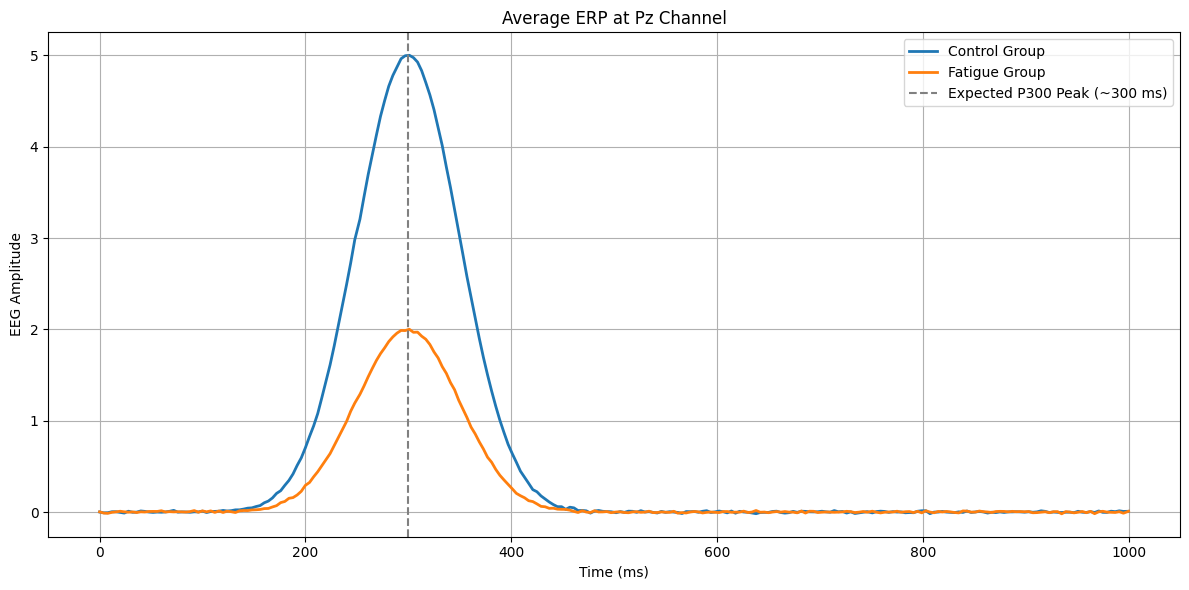

In [58]:
import matplotlib.pyplot as plt

# Start plotting the ERP waveforms
plt.figure(figsize=(12,6))
plt.plot(erp_df['time_ms'], erp_df['control'], label='Control Group', linewidth=2)
plt.plot(erp_df['time_ms'], erp_df['fatigue'], label='Fatigue Group', linewidth=2)
plt.axvline(x=300, color='gray', linestyle='--', label='Expected P300 Peak (~300 ms)')
plt.title('Average ERP at Pz Channel')
plt.xlabel('Time (ms)')
plt.ylabel('EEG Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()